In [1]:
import pandas as pd
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
text_train_df = pd.read_csv('/content/drive/MyDrive/combined_train.csv')
text_test_df = pd.read_csv('/content/drive/MyDrive/combined_train.csv')

In [4]:
text_train_df.head()

,text_cleaned,language,directness_label,target_label,group_label,hatespeech,hatespeech.1,directness_label.1,target_label.1,group_label.1,sentiment_anger,sentiment_confusion,sentiment_disgust,sentiment_fear,sentiment_indifference,sentiment_normal,sentiment_sadness,sentiment_shock,language_encoded
0,يلعن شرفك يا حكم!!!,arabic,2,2,12,0,0,2,2,12,0,0,0,0,0,1,0,0,2
1,RT @J23app: Feb 2015 Jordan 4 Retro Remastered...,english,2,2,12,0,0,2,2,12,0,0,0,0,0,1,0,0,0
2,Blague : Mec : Je vais me laisser pousser la m...,french,2,2,12,0,0,2,2,12,0,0,0,0,0,1,0,0,1
3,I just put down a pan of brownies,english,2,2,12,0,0,2,2,12,0,0,0,0,0,1,0,0,0
4,في بني آدم عنده عقل بنزل مادة مقدمة في علم الم...,arabic,2,2,12,0,0,2,2,12,0,0,0,0,0,1,0,0,2


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [6]:
text_train_df['text_cleaned'] = text_train_df['text_cleaned'].fillna('')
text_test_df['text_cleaned'] = text_test_df['text_cleaned'].fillna('')

### Baseline model predicts "Target" class only

In [7]:
X_train = text_train_df['text_cleaned']
y_train = text_train_df['target_label']
X_test = text_test_df['text_cleaned']
y_test = text_test_df['target_label']

#TD-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Train
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train_vec, y_train)

#Evaluate
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1825
           1       0.80      0.69      0.74      1476
           2       0.90      0.96      0.93     15939
           3       0.82      0.79      0.81      6329
           4       0.72      0.59      0.65      3968
           5       0.73      0.14      0.23       330
           6       0.84      0.89      0.86       835

    accuracy                           0.85     30702
   macro avg       0.80      0.71      0.72     30702
weighted avg       0.84      0.85      0.84     30702



In [8]:
text_train_df['target_label'].value_counts()

,count
target_label,
2,15939
3,6329
4,3968
0,1825
1,1476
6,835
5,330


<Axes: >

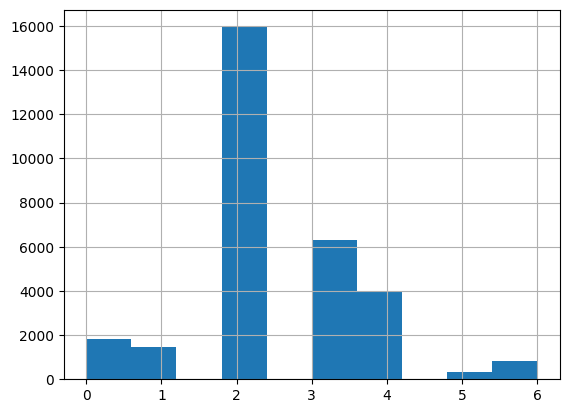

In [9]:
text_train_df['target_label'].hist()

In [10]:
text_train_df['language'].unique()

array(['arabic', 'english', 'french'], dtype=object)

arabic


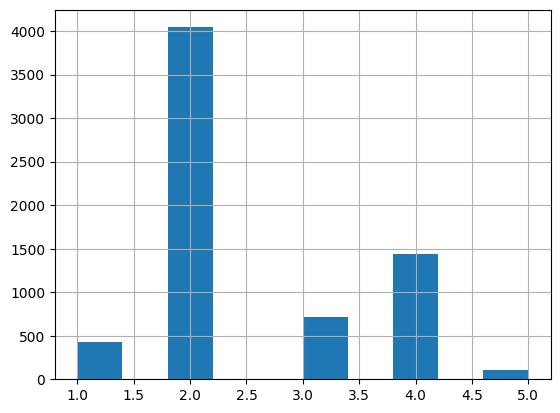

english


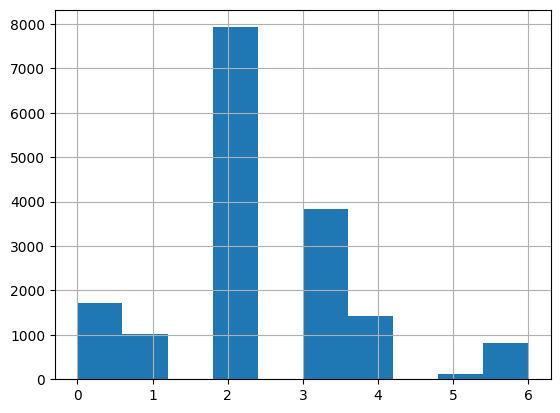

french


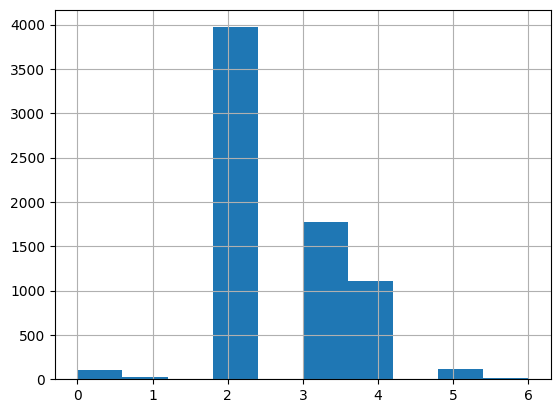

In [11]:
for lang in text_train_df['language'].unique():
  print(lang)
  text_train_df[text_train_df['language'] == lang]['target_label'].hist()
  plt.show()
  #['target_label'].hist()
  #text_train_df['target_label'].hist()

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Micro Precision:", precision_score(y_test, y_pred, average="micro"))
print("Micro Recall:", recall_score(y_test, y_pred, average="micro"))
print("Micro F1-score:", f1_score(y_test, y_pred, average="micro"))

Micro Precision: 0.8511823333984757
Micro Recall: 0.8511823333984757
Micro F1-score: 0.8511823333984757


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... after training and prediction
report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", accuracy_score(y_test, y_pred))

# F1-Scores
print("Macro F1-score:", report["macro avg"]["f1-score"])
print("Weighted F1-score:", report["weighted avg"]["f1-score"])
print("Micro F1-score:", report["micro avg"]["f1-score"])

# Precision and Recall (Micro)
print("Micro Precision:", report["micro avg"]["precision"])
print("Micro Recall:", report["micro avg"]["recall"])


Accuracy: 0.8511823333984757
Macro F1-score: 0.7231668545024397
Weighted F1-score: 0.8442010680606236


KeyError: 'micro avg'

In [14]:
# Classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print summary metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1-score:", report["macro avg"]["f1-score"])
print("Weighted F1-score:", report["weighted avg"]["f1-score"])

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8511823333984757
Macro F1-score: 0.7231668545024397
Weighted F1-score: 0.8442010680606236

Confusion Matrix:
 [[ 1579    13   100    77    53     0     3]
 [   38  1025   118    70   194     0    31]
 [    2     5 15377   351   196     8     0]
 [  134    79   637  5014   400     7    58]
 [  156   145   770   497  2351     2    47]
 [   11     2   105    82    78    46     6]
 [   18    14    38    17     7     0   741]]


In [17]:
from sklearn.metrics import log_loss

# Probabilities for each class
y_prob = clf.predict_proba(X_test_vec)

# Cross-entropy loss
eval_loss = log_loss(y_test, y_prob)
print("Eval Loss (Log Loss):", eval_loss)


Eval Loss (Log Loss): 0.47688355879854566


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Get number of classes
num_classes = len(set(y_test))

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))

# AUC score
auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
print("Eval AUC (macro, ovr):", auc)


Eval AUC (macro, ovr): 0.9778900073350734
